In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [2]:
# ts_eval = ThompsonSampling.load("data/thompson_sampling/TS-100.pkl")
dqn_training = train_dqn(true_env, 1000, "Test")
# dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")

In [ ]:
episodes = []
tr = transition_model_full()
V = np.zeros(len(STATES))
hr_counts = init_hr_counts()
bp_counts = init_bp_counts()
o2_counts = init_o2_counts()
glu_counts = init_glu_counts()
state_counts = hr_counts, bp_counts, o2_counts, glu_counts

In [ ]:
env = TrModelEnv(transition_model_factored(*state_counts))
model_training = train_dqn(env=env, nr_iter=10000, name="TS")
policies = [model_training.get_policy()]

In [5]:
# for _ in range(nr_iterations):
#     tr = transition_model(state_counts[0], state_counts[1], state_counts[2], state_counts[3])
#     opt_pol = matrix_value_iteration(V, tr)
#     learned.append(opt_pol)
#     pol, V = opt_pol
#     # Run episodes with the current policy
#     for _ in range(nr_episodes):
#         episode = run_episode(pol)
#         episodes.append(episode)
#         state_counts = update_counts(episode, state_counts[0], state_counts[1], state_counts[2], state_counts[3])

In [15]:
nr_iterations = 100
nr_episodes = 1

In [ ]:
for _ in range(nr_iterations):
    tr = transition_model_factored(*state_counts)
    env = TrModelEnv(tr)
    model_training.retrain(env, 1000)
    policy = model_training.get_policy()
    policies.append(policy)
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(policy)
        episodes.append(episode)
        state_counts = update_factored_counts(episode, *state_counts)

In [ ]:
ts_eval = ThompsonSampling(len(episodes), episodes, "TS-10", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval.save()


'data/thompson_sampling/TS-10.pkl'

In [ ]:
len(ts_eval.episodes)


72

In [ ]:
ts_eval.evaluate_policy(100000)

-0.64748

In [ ]:
dqn_training.evaluate_policy(100000)

-0.58699

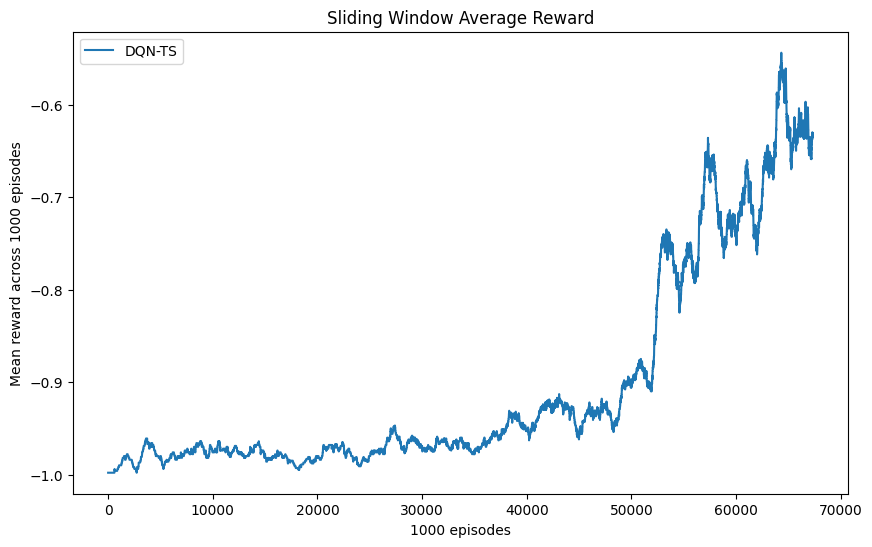

In [59]:
plot_rewards([model_training], model_training.nr_iterations, 1000)

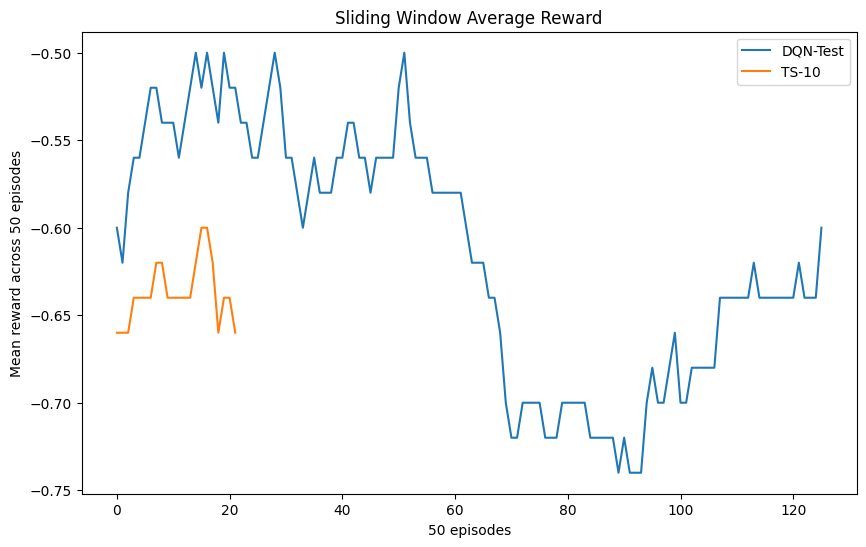

In [63]:
plot_rewards([dqn_training, ts_eval,], 50000, 50)